In [ ]:
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
result_dir = os.path.join(os.path.dirname(os.getcwd()), 'result', 'grad_inspect')
figure_dir = os.path.join(os.path.dirname(os.getcwd()), 'figure')

from src.simulator.gnk import gnk
import torch
import numpy as np
from src.plot import plot_recovery
import seaborn as sns
from src.plot import prepare_data_for_coverage_plot
import matplotlib
from matplotlib.patches import Patch

plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

In [3]:
from torch import nn, Tensor
from scipy.stats import entropy, norm

## NPE

In [4]:
net_surgery_rescale = torch.load(os.path.join(result_dir, 'gradient_inspect_n_1000_100_gradient_surgery_gradient_rescale.pt'), map_location=torch.device('cpu'))
net_surgery = torch.load(os.path.join(result_dir, 'gradient_inspect_n_1000_100_gradient_surgery.pt'), map_location=torch.device('cpu'))
net_rescale = torch.load(os.path.join(result_dir, 'gradient_inspect_n_1000_100_gradient_rescale.pt'), map_location=torch.device('cpu'))
net_none = torch.load(os.path.join(result_dir, 'gradient_inspect_n_1000_100.pt'), map_location=torch.device('cpu'))

/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_82752/4290006149.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net_surgery_rescale = torch.load(os.path.join

In [75]:
loss_array_surgery_rescale = np.load(os.path.join(result_dir, 'gradient_inspect_n_1000_100_gradient_surgery_gradient_rescale_grad_inspect.npy'))
loss_array_surgery = np.load(os.path.join(result_dir, 'gradient_inspect_n_1000_100_gradient_surgery_grad_inspect.npy'))
loss_array_rescale = np.load(os.path.join(result_dir, 'gradient_inspect_n_1000_100_gradient_rescale_grad_inspect.npy')) 
loss_array_none = np.load(os.path.join(result_dir, 'gradient_inspect_n_1000_100_grad_inspect.npy'))

In [72]:
def plot_loss_array(loss_array, start = 0, end = None):
    """
    plot array of losses and other quantities of interest for gradient inspection
    """

    fig, axes = plt.subplots(5, 2, figsize = (10, 10))
    axes = axes.flatten()

    # [h_0, \bar{f}_\phi^{1+}, \bar{f}_\phi^{1-}, 
            # ||\nabla h_0||, ||\nabla\bar{f}_\phi^{1+}||, ||\nabla\bar{f}_\phi^{1-}||, ||\nabla h_c||,
            # cos-sim(\nabla h_0, \nabla h_c), gradient_surgery_flag]
    titles = [
        r'$\ell_{MLMC}$',
        r'$h_0$',
        r'$\bar{f}_\phi^{1+}$',
        r'$\bar{f}_\phi^{1-}$',
        r'$||\nabla h_0||$',
        r'$||\nabla \bar{f}_\phi^{1+}||$',
        r'$||\nabla \bar{f}_\phi^{1-}||$',
        r'$||\nabla h_c||$',
        r'cos-sim$(\nabla h_0, \nabla h_c)$',
        'gradient surgery flag'
    ]

    loss = np.sum(loss_array[:, 0:3], axis = 1)

    loss_array = np.hstack([loss.reshape(-1, 1), loss_array])


    for i in range(loss_array.shape[-1]):
        axes[i].plot(loss_array[start:end, i], label = 'loss {}'.format(i))
        axes[i].set_xlabel('epoch')
        axes[i].set_title(titles[i])

    fig.tight_layout()
    return fig

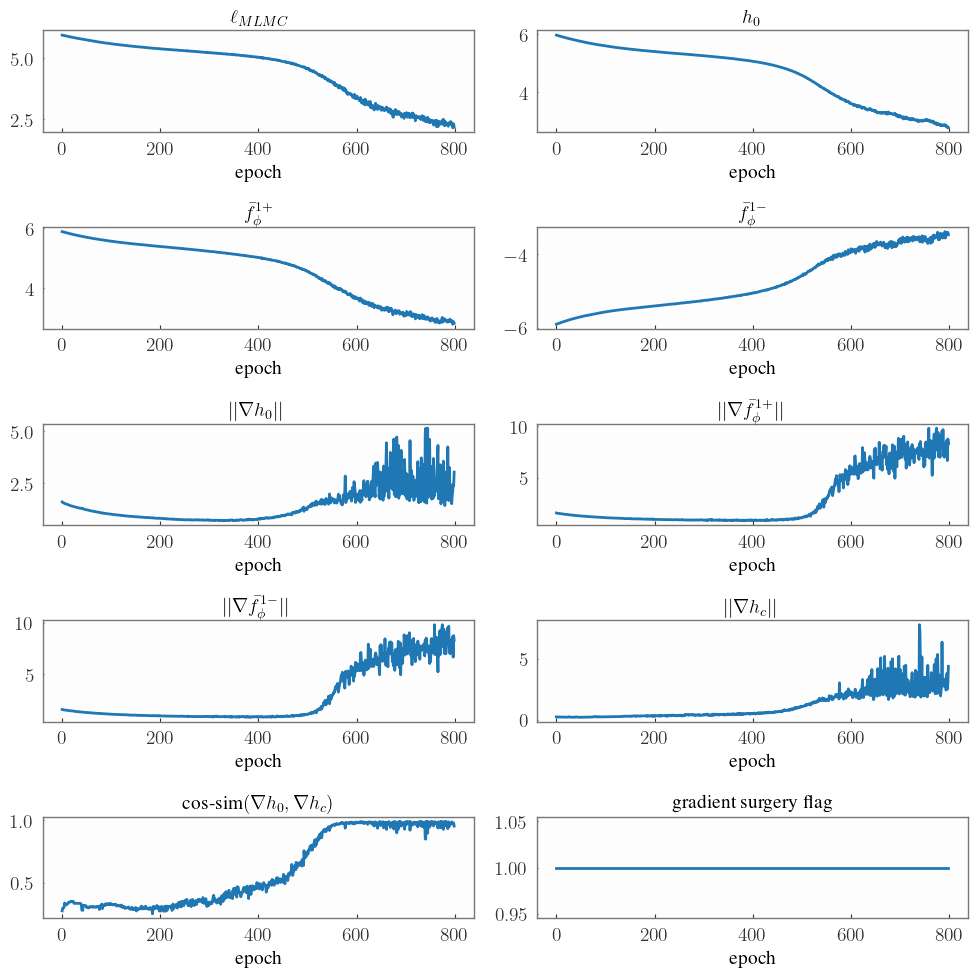

In [67]:
f = plot_loss_array(loss_array_surgery_rescale)

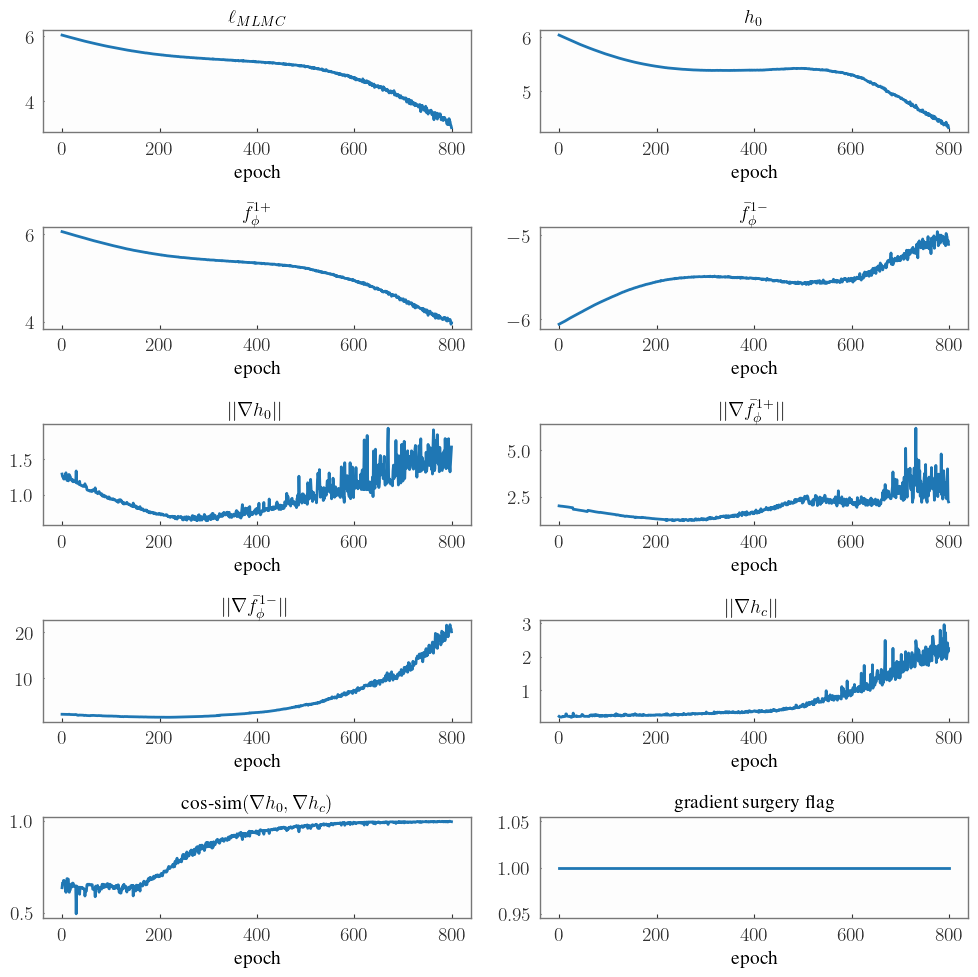

In [68]:
f = plot_loss_array(loss_array_surgery)

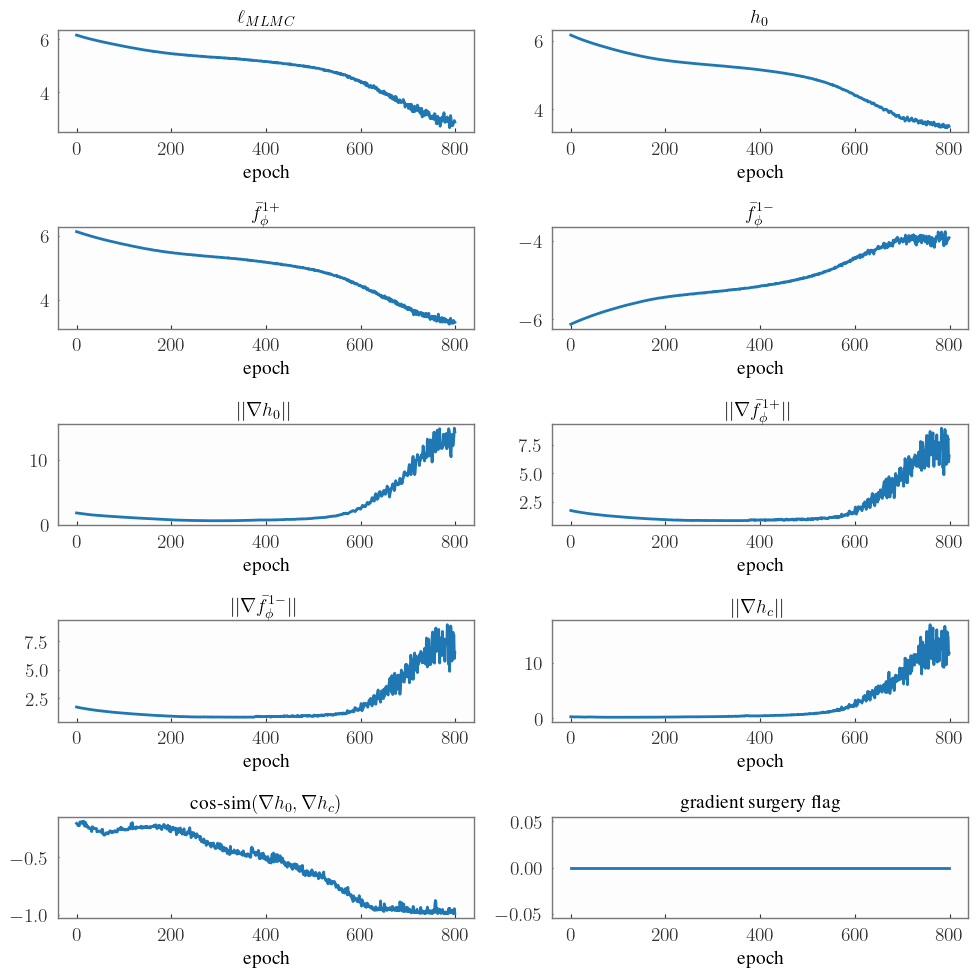

In [69]:
f = plot_loss_array(loss_array_rescale)

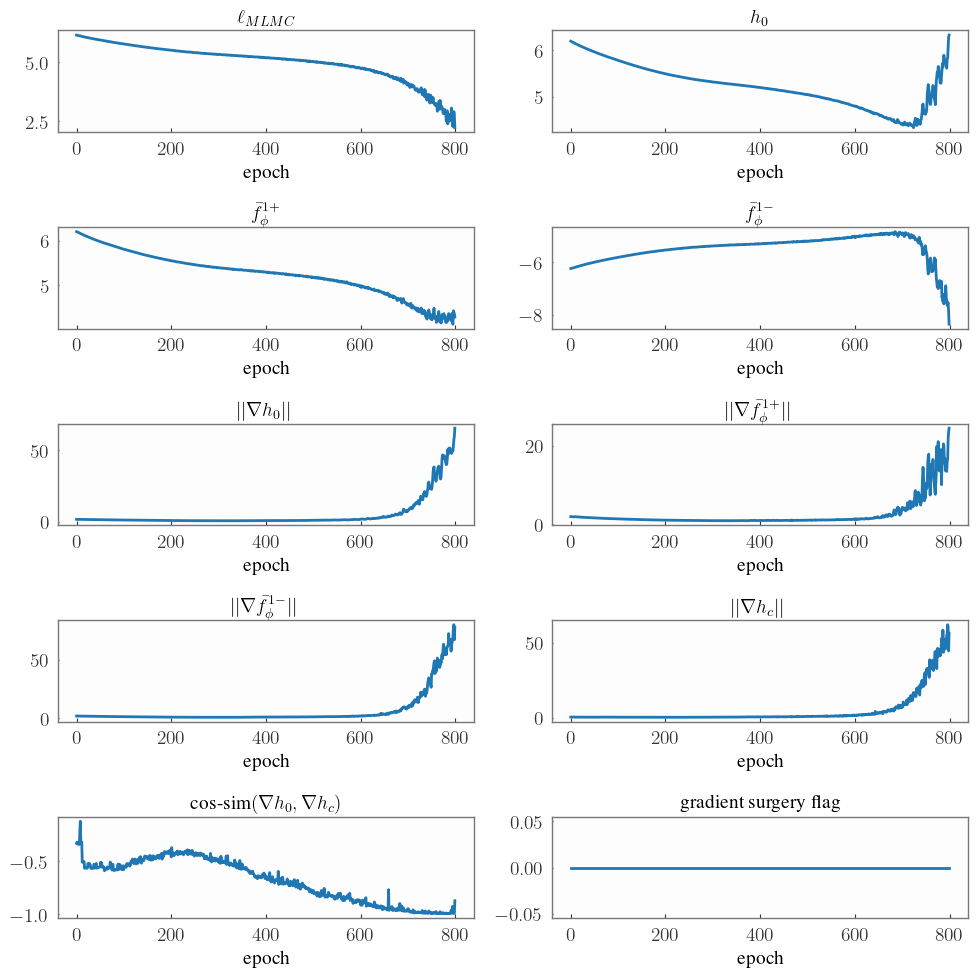

In [72]:
f = plot_loss_array(loss_array_none)

In [70]:
loss_array_surgery_rescale = np.load(os.path.join(result_dir, 'nle_gradient_inspect_n_10000_300_gradient_surgery_gradient_rescale_grad_inspect.npy'))
loss_array_surgery = np.load(os.path.join(result_dir, 'nle_gradient_inspect_n_10000_300_gradient_surgery_grad_inspect.npy'))
loss_array_rescale = np.load(os.path.join(result_dir, 'nle_gradient_inspect_n_10000_300_gradient_rescale_grad_inspect.npy')) 
loss_array_none = np.load(os.path.join(result_dir, 'nle_gradient_inspect_n_10000_300_grad_inspect.npy'))

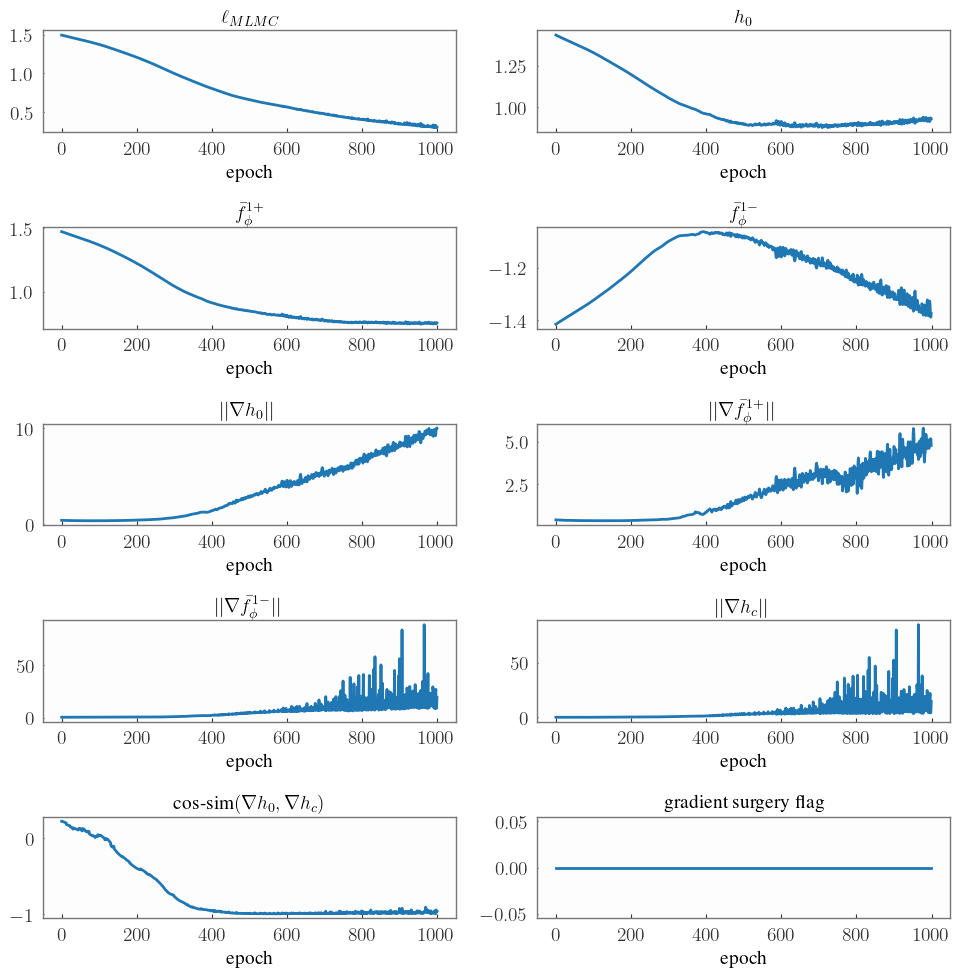

In [73]:
f =plot_loss_array(loss_array_none)

In [5]:
np.random.seed(0)
simulator = gnk()
theta, x = simulator(n = 500, m = 1000)
theta = np.load(os.path.join(result_dir, 'gnk_posterior_theta.npy'))
x = np.load(os.path.join(result_dir, 'gnk_posterior_x.npy'))
t_theta = torch.tensor(theta, dtype=torch.float32)
t_x = torch.tensor(x, dtype=torch.float32)

In [6]:
nlpd_s_r = - net_surgery_rescale.log_prob_unstandardized(t_theta, t_x).detach().numpy()
nlpd_s = - net_surgery.log_prob_unstandardized(t_theta, t_x).detach().numpy()
nlpd_r = - net_rescale.log_prob_unstandardized(t_theta, t_x).detach().numpy()
nlpd_none = - net_none.log_prob_unstandardized(t_theta, t_x).detach().numpy()

In [79]:
nlpd_s_r.mean(), nlpd_s.mean(), nlpd_r.mean(), nlpd_none.mean()

(-0.30489308, -0.11306039, -0.21329108, -0.13261443)

In [80]:
nlpd_s_r.std(), nlpd_s.std(), nlpd_r.std(), nlpd_none.std()

(0.31323025, 0.11186552, 0.2544732, 0.2746703)

## NLE

In [7]:
n = 500
eval_points = 2000
x_grid = np.linspace(-30, 30, eval_points)
exact_densities = np.load(os.path.join(result_dir, 'g_n_k_exact_densities_NLE.npy'))
theta = np.load(os.path.join(result_dir, 'g_n_k_theta_NLE.npy'))
t_x_grid = torch.tensor(x_grid, dtype = torch.float32)
t_theta = torch.tensor(theta, dtype = torch.float32)

In [17]:
simulator = gnk()
u = simulator.noise_generator(n, m = 1000)
z_u = simulator.z_high(u)

In [20]:
x_ref = simulator.g_and_k(z_u, theta)

In [36]:
x_ref = torch.tensor(x_ref, dtype = torch.float32)

In [8]:
nle_net_surgery_rescale = torch.load(os.path.join(result_dir, 'nle_gradient_inspect_n_10000_300_gradient_surgery_gradient_rescale.pt'), map_location=torch.device('cpu'))
nle_net_surgery = torch.load(os.path.join(result_dir, 'nle_gradient_inspect_n_10000_300_gradient_surgery.pt'), map_location=torch.device('cpu'))
nle_net_rescale = torch.load(os.path.join(result_dir, 'nle_gradient_inspect_n_10000_300_gradient_rescale.pt'), map_location=torch.device('cpu'))
nle_net_none = torch.load(os.path.join(result_dir, 'nle_gradient_inspect_n_10000_300.pt'), map_location=torch.device('cpu'))

/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_82752/4008114305.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nle_net_surgery_rescale = torch.load(os.path.

In [ ]:
def obtain_density_over_grid(network: nn.Module, x_grid: Tensor, theta: Tensor, network_type: str = 'nsf'):
    """
    network: nn.Module
    Input: x_grid [n_eval_points]
    theta: [theta_dim]
    """

    n_eval_points = x_grid.shape[0]
    theta = theta.repeat(n_eval_points, 1)    
    if network_type == 'nsf':
        x_grid = x_grid.view(-1, 1)
    
    return network.log_prob_unstandardized(x_grid, theta, log = False).detach().numpy()

def obtain_density(network: nn.Module, x_test: Tensor, theta_test: Tensor, network_type: str = 'nsf'):
    n = theta_test.shape[0]
    m = x_test.shape[0]
    density = np.zeros((n, m))

    for i in range(n):
        density[i:,] = obtain_density_over_grid(network, x_test, theta_test[i], network_type)

    return density

def obtain_kl(approximated_densities, exact_densities, forward = True):
    
    jitter = 1e-20
    exact_densities = np.clip(exact_densities, jitter, None)

    kl = np.zeros((approximated_densities.shape[0]))

    for i in range(approximated_densities.shape[0]):

        if forward:
            kl[i] = entropy(exact_densities[i], approximated_densities[i]) # forward KL divergence 

        else:
            kl[i] = entropy(approximated_densities[i], exact_densities[i])

    return kl

In [ ]:
dense_s_r =  obtain_density(nle_net_surgery_rescale, t_x_grid, t_theta)
dense_s = obtain_density(nle_net_surgery, t_x_grid, t_theta)
dense_r = obtain_density(nle_net_rescale, t_x_grid, t_theta)
dense_none = obtain_density(nle_net_none, t_x_grid, t_theta)

kl_s_r = obtain_kl(dense_s_r, exact_densities)
kl_s = obtain_kl(dense_s, exact_densities)
kl_r = obtain_kl(dense_r, exact_densities)
kl_none = obtain_kl(dense_none, exact_densities)

In [119]:
kl_s_r.mean(), kl_s.mean(), kl_r.mean(), kl_none.mean()

(0.21869802772124083,
 0.2425256508876579,
 0.21379890044061506,
 0.23519085729964836)

In [120]:
kl_s_r.std(), kl_s.std(), kl_r.std(), kl_none.std()

(0.46584998716210146,
 0.45757690475476775,
 0.45467310795835275,
 0.2792666688760228)